## Прогнозирование вероятности оттока пользователей для фитнес-центров

#### Цель — провести анализ и подготовить план действий по удержанию клиентов. 

**Шаг 1. Загрузка данных**

In [1]:
import pandas as pd

In [2]:
# задействуем фичи, от ошибок при повторном использовании одного и того же df
# и для отображения трёх символов после запятой для всех значений с плавающей запятой
# малые финансовые переменные любят 2-3 значения после запятой 
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'C:/Users/PC/проекты Яндекс/Датасеты/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП
username = 'PC'
try:
    username = os.environ["USERNAME"]
except:
    pass
if(username == 'PC'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp
df = pd.read_csv(root_path + 'gym_churn.csv')

**Шаг 2. Проведём исследовательский анализ данных (EDA)**

**1. Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())**


In [4]:
df.head().T

,0,1,2,3,4
gender,1.000,0.000,0.000,0.000,1.000
Near_Location,1.000,1.000,1.000,1.000,1.000
Partner,1.000,0.000,1.000,1.000,1.000
Promo_friends,1.000,0.000,0.000,1.000,1.000
Phone,0.000,1.000,1.000,1.000,1.000
Contract_period,6.000,12.000,1.000,12.000,1.000
Group_visits,1.000,1.000,0.000,1.000,0.000
Age,29.000,31.000,28.000,33.000,26.000
Avg_additional_charges_total,14.227,113.203,129.448,62.670,198.362
Month_to_end_contract,5.000,12.000,1.000,12.000,1.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

*Данные чистые, что называется "tidy data". Пропусков не обнаружено.*

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.000,0.510,0.500,0.000,0.000,1.000,1.000,1.000
Near_Location,4000.000,0.845,0.362,0.000,1.000,1.000,1.000,1.000
Partner,4000.000,0.487,0.500,0.000,0.000,0.000,1.000,1.000
Promo_friends,4000.000,0.308,0.462,0.000,0.000,0.000,1.000,1.000
Phone,4000.000,0.903,0.295,0.000,1.000,1.000,1.000,1.000
Contract_period,4000.000,4.681,4.550,1.000,1.000,1.000,6.000,12.000
Group_visits,4000.000,0.412,0.492,0.000,0.000,0.000,1.000,1.000
Age,4000.000,29.184,3.258,18.000,27.000,29.000,31.000,41.000
Avg_additional_charges_total,4000.000,146.944,96.356,0.148,68.869,136.220,210.950,552.591
Month_to_end_contract,4000.000,4.323,4.191,1.000,1.000,1.000,6.000,12.000


**Вывод:**

Аватар среднего клиента в клубе:

- мужчина или женщина
- близко живущий
- без друзей в среди сотрудников клуба
- с известным номером телефона
- абониментом сроком на около 5 месяцев
- не посещяющий групповые занятия
- тратит в среднем 150 р на доп услуги
- посещает клуб в среднем 2 раза в неделю или 2 раза в месяц

Что может **не** влиять на отток:
- гендерное различие - 50/50
- партнёрка
- возраст

Что может влиять на отток:
- локация
- рефералка 
- наличие телефона
- период действия абонемента
- групповые занятия
- средняя частота посещений

In [7]:
# приведем название столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**2. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())**

In [8]:
df.groupby(['churn']).mean().T.sort_values(by = 0, ascending = False)

churn,0,1
avg_additional_charges_total,158.446,115.083
age,29.977,26.990
contract_period,5.747,1.729
month_to_end_contract,5.283,1.663
lifetime,4.712,0.991
avg_class_frequency_current_month,2.028,1.045
avg_class_frequency_total,2.025,1.475
phone,0.904,0.903
near_location,0.873,0.768
partner,0.534,0.355


In [9]:
# посмторим на разницу средних значений
df_churn_0 = df[df['churn'] == 0] # сделаем фильтр тех кто ещё остался
df_churn_1 = df[df['churn'] == 1] # и тех кто уже ушёл

df_churn_0_mean = pd.DataFrame(df_churn_0.groupby(['churn'], as_index = False)['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'].mean()).reset_index()

df_churn_1_mean = pd.DataFrame(df_churn_1.groupby(['churn'])['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'].mean()).reset_index()

# ((df_churn_0_mean / df_churn_1_mean)*100).T
(df_churn_0_mean / df_churn_1_mean).T.sort_values(by = 0, ascending = True)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


,0
churn,0.000
gender,0.998
phone,1.001
age,1.111
near_location,1.137
avg_class_frequency_total,1.373
avg_additional_charges_total,1.377
partner,1.503
group_visits,1.728
promo_friends,1.924


**3. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


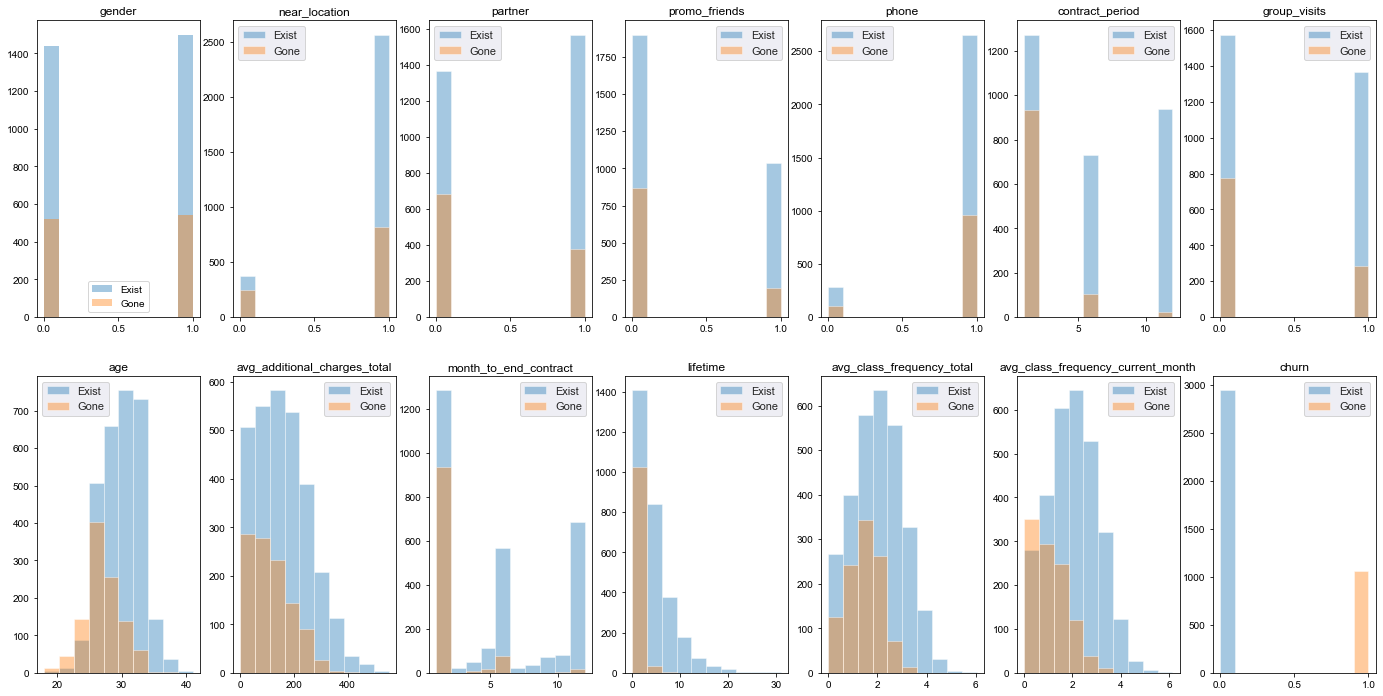

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,7, figsize = (24,12))
ax = ax.ravel()

for i in range(len(df.columns)):
    col_name = df.columns[i]
    range_graph = (df[col_name].min(), df[col_name].max()) 
    sns.distplot(df_churn_0[col_name], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label='Exist', bins = 10, axlabel = False)      
    sns.distplot(df_churn_1[col_name], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label='Gone', bins = 10, axlabel = False)
    ax[i].legend()
    ax[i].set_title(col_name)
    sns.set()
    
plt.show()

**Вывод**

Признаки которые различаются по оттоку:
- локация;
- партнёрка;
- рефералка;
- контактные данные (телефон);
- период действия абонемента;
- посещение групповых занятий;
- возраст;
- частота посещений.

Признаки которые не влияют на отток:
- пол.

**4. Построим матрицу корреляций и отобразите её**

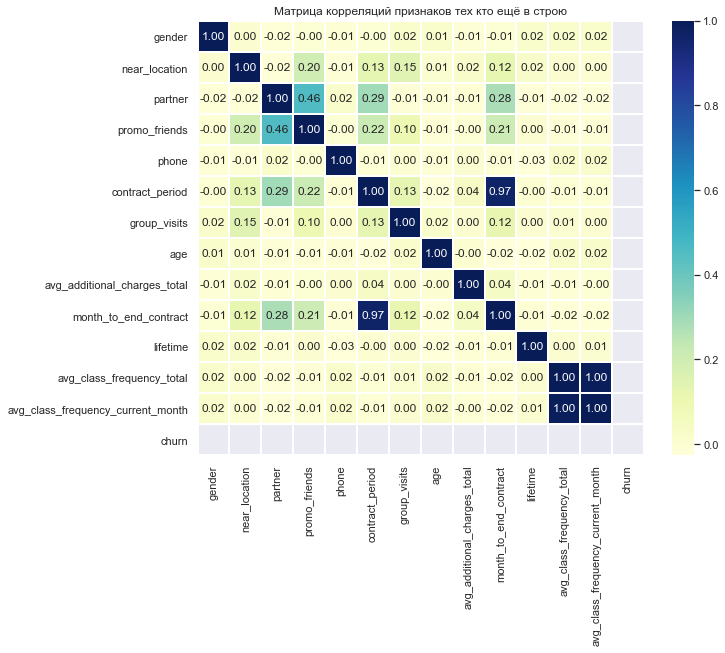

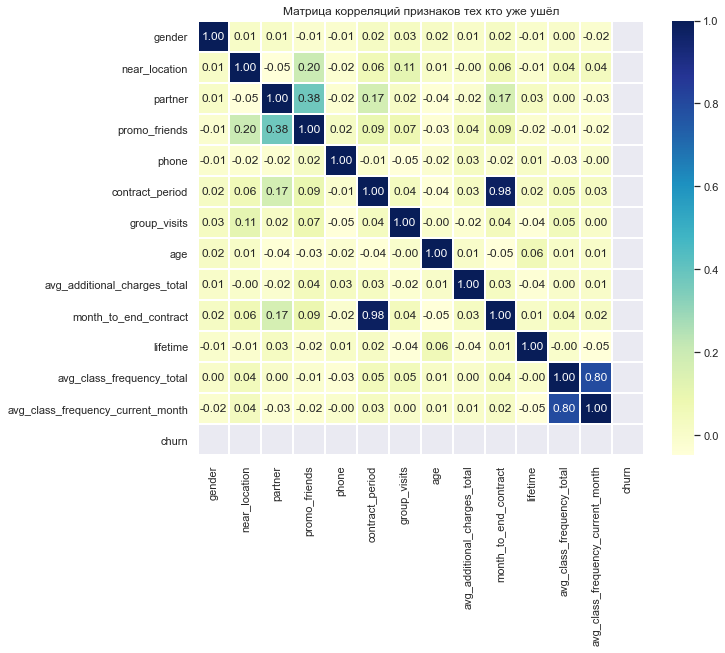

In [11]:
# для попа
corr_m = df_churn_0.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций признаков тех кто ещё в строю');

corr_m = df_churn_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций признаков тех кто уже ушёл');

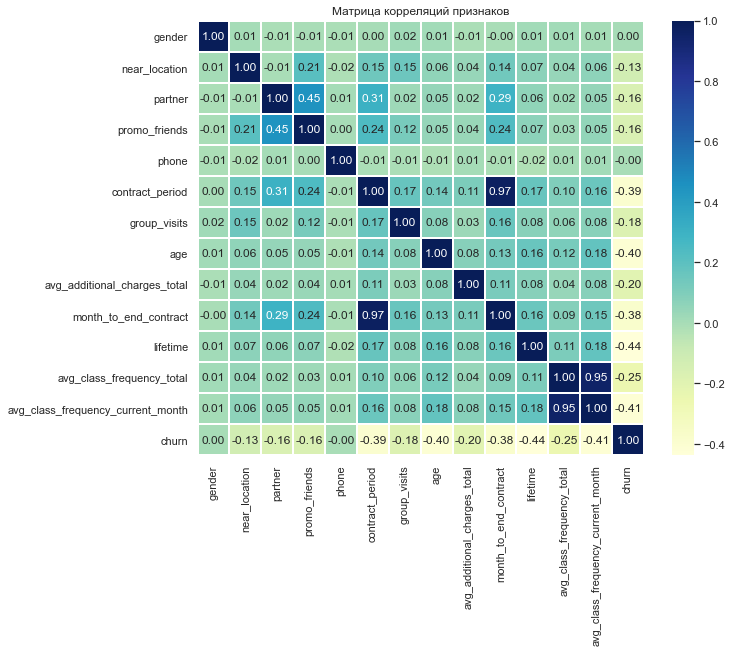

In [12]:
# с учетом оттока
corr_m = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, cmap="YlGnBu", annot = True, fmt='.2f', linewidths=1) 
plt.title('Матрица корреляций признаков');

**Вывод:**

Лучше всего коррелируется:
- конец месяца и период
- рефералка и сотрудники компании
- средняя выручка в месяц от других услуг и средняя частота посещений в неделю за предыдущий месяц
- ушедних меньше в 5 раз в сравнении с пришедшими
- не которые признаки никак не влиляют на отток, такие как, возраст, пол и наличие телефона

**Шаг 3. Построим модель прогнозирования оттока пользователей**



1. Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
- Разбьем данные на обучающую и валидационную выборку функцией train_test_split().
- Обучим модель на train-выборке двумя способами:
    - логистической регрессией
    - случайным лесом
2. Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Ответим на вопрос какая модель показала себя лучше на основании метрик? При этом не забудим указать параметр random_state при разделении выборки и задании алгоритма.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [14]:
# определим функцию, которая будет выводить метрики
def print_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [15]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns = ['churn'])
y = df['churn']

In [16]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [17]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
# Преобразуем обучающие и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs')
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [20]:
# создадим датафрейм с признаками и их весами
lr_features = pd.DataFrame({'features' : X_train.columns, 'coeff' : lr_model.coef_.ravel()}) # воспользуйтесь методом coef_
# обратим коэф-ты по модулю для оценки влияния на признаки 
lr_features['coeff_abs'] = abs(lr_features['coeff']) 
# выведите упорядоченный по модулю коэффициентов датафрейм с признаками
lr_features.sort_values('coeff_abs', ascending = False)

,features,coeff,coeff_abs
12,avg_class_frequency_current_month,-4.454,4.454
10,lifetime,-3.846,3.846
11,avg_class_frequency_total,3.300,3.300
7,age,-1.091,1.091
5,contract_period,-0.719,0.719
8,avg_additional_charges_total,-0.552,0.552
9,month_to_end_contract,-0.534,0.534
6,group_visits,-0.393,0.393
3,promo_friends,-0.276,0.276
2,partner,-0.082,0.082


In [21]:
# предскажем какой-нибудь набор параметров с уклоном на влияние параметра avg_class_frequency_current_month 
import numpy as np
X_real_1 = np.array([1,1,0,0,1,1,1,33,97,1,1,10,1.5]).reshape((1, -1))
X_real_0 = np.array([1,1,0,0,1,1,1,33,97,1,1,1,1.5]).reshape((1, -1))

In [22]:
X_real_st_1 = scaler.transform(X_real_1)
X_real_st_0 = scaler.transform(X_real_0)

In [23]:
lr_model.predict(X_real_st_1)

array([1], dtype=int64)

In [24]:
lr_model.predict(X_real_st_0)

array([0], dtype=int64)

### Модель предсказывает!

In [25]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [26]:
# создадим датафрейм с признаками и их весами
rf_features = pd.DataFrame({'feature' : X_train.columns, 'importance' : rf_model.feature_importances_}) # воспользуйтесь методом coef_

# выведите упорядоченный по модулю коэффициентов датафрейм с признаками
rf_features.sort_values('importance', ascending = False)

,feature,importance
10,lifetime,0.276
12,avg_class_frequency_current_month,0.180
11,avg_class_frequency_total,0.130
7,age,0.119
8,avg_additional_charges_total,0.091
9,month_to_end_contract,0.069
5,contract_period,0.066
6,group_visits,0.016
0,gender,0.012
2,partner,0.012


In [27]:
# посчитаем все метрики
print_metrics(y_test, lr_predictions, lr_probabilities, title = 'Метрики для модели логистической регрессии:')
print_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


**Вывод:** 

- Обе модели предсказания не плохо работают с человеческой логикой и показывают, что для того, чтобы удерживать клиента, нужно как можно дольше держать в клубе и чаще контактировать клиентами, чтобы мотивировать их на частые посещения. То есть переводя на язык бизнеса, стараться продавать абонементы от 12 месяцев и регулярно рекламировать события в клубе.
- Более простая модель логистической регрессии работает лучше по всем метрикам.

**Шаг 4. Сделаем кластеризацию пользователей**

Стандартизируем данные и построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.

In [28]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
# стандартизируем данные
sc = StandardScaler() # создаём объект класса scaler (нормализатор)
# обучаем нормализатор и преобразуем набор данных без учёта оттока, чтобы это не повлияло на модель
X_sc = sc.fit_transform(df.drop(columns = 'churn')) 

In [30]:
# построим матрицу расстояний
linked = linkage(X_sc, method = 'ward')

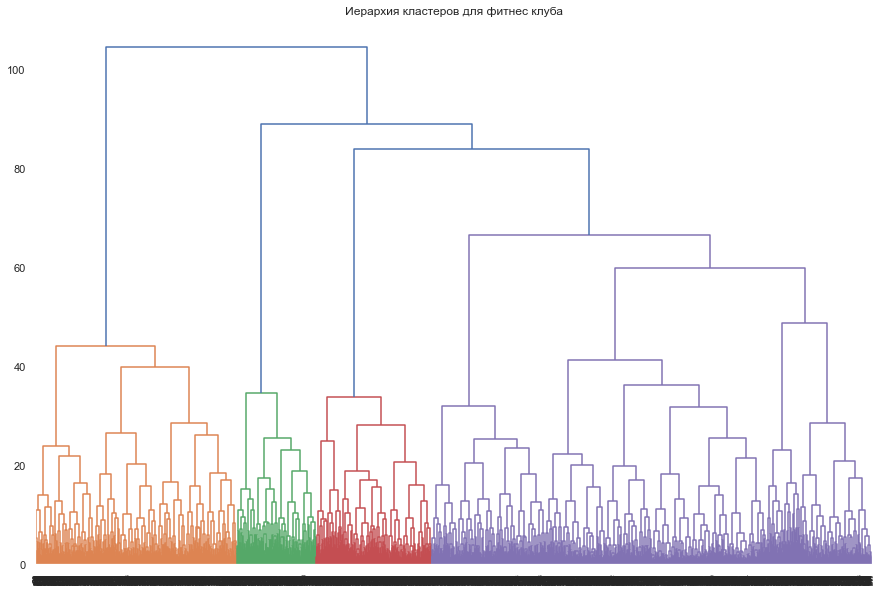

In [31]:
# визуализируем таблицу расстояний linked
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархия кластеров для фитнес клуба')
plt.show()

**Вывод:** предположительное число кластеров 4, в соответствии с цветами

**Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров принимаем n=5.**


In [32]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0) # 
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)

# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels
df['cluster_km'].head()

0    0
1    4
2    3
3    4
4    3
Name: cluster_km, dtype: int32

**Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

In [33]:
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby(['cluster_km']).mean().sort_values('churn')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
4,0.496,0.943,0.752,0.542,1.000,11.353,0.564,29.994,164.564,10.376,4.817,2.028,2.020,0.024
2,0.560,0.858,0.338,0.197,0.999,2.730,0.449,30.196,164.579,2.520,5.011,2.928,2.934,0.048
0,0.522,0.862,0.470,0.306,0.000,4.787,0.426,29.301,143.958,4.475,3.925,1.847,1.716,0.268
3,0.510,0.750,1.000,0.452,1.000,2.554,0.303,28.499,129.813,2.370,2.832,1.355,1.176,0.396
1,0.481,0.813,0.000,0.086,1.000,1.867,0.325,28.145,131.369,1.791,2.346,1.326,1.087,0.550


**Вывод:**

Максимальный отток у кластеров под номером 1 и 3. Также у него наименьший *lifetimе* и время с момента первого обращения *month_to_end_contract* 1-2 месяца, договор на 3 месяца, локация, партёрка, рефералка и групповые занятия тоже заметно снижаются в этом кластере. Складывается впечатление, что выгоднее продавать абонементы на 6 и 12 месяцев. Кажется, что можно рассматривать и меньшее число кластеров, например 3, отбросив не влияющие признаки на отток (возраст, пол)

**Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?**

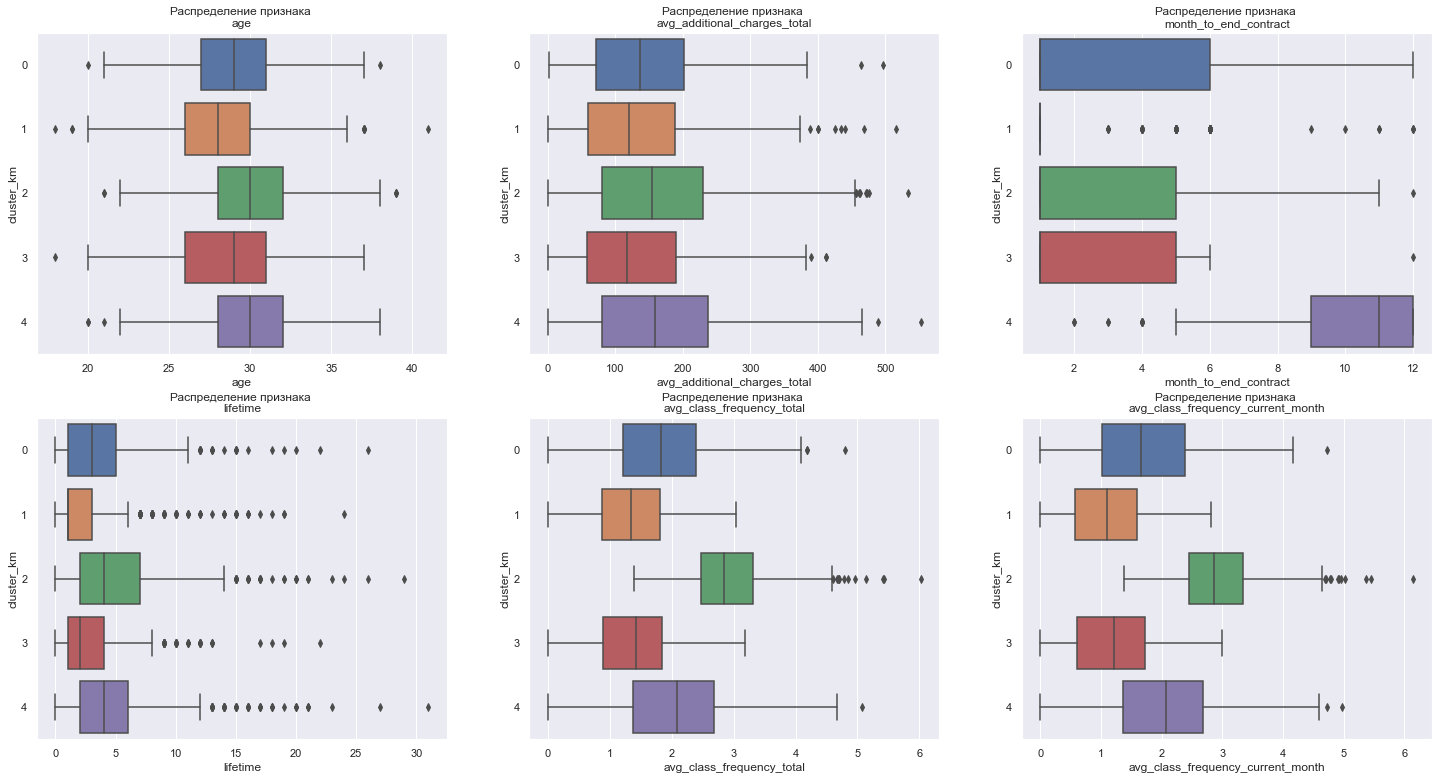

In [34]:
# для непрерывных признаков построим boxplot
cols_var = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
for i, col in enumerate(cols_var):
    plt.subplot(2, 3, i+1)
    fig = plt.gcf()
    fig.set_size_inches(25, 13)
    sns.boxplot(data = df, x = col, y = 'cluster_km', orient = 'h')
    plt.title('Распределение признака \n'+ str(col))

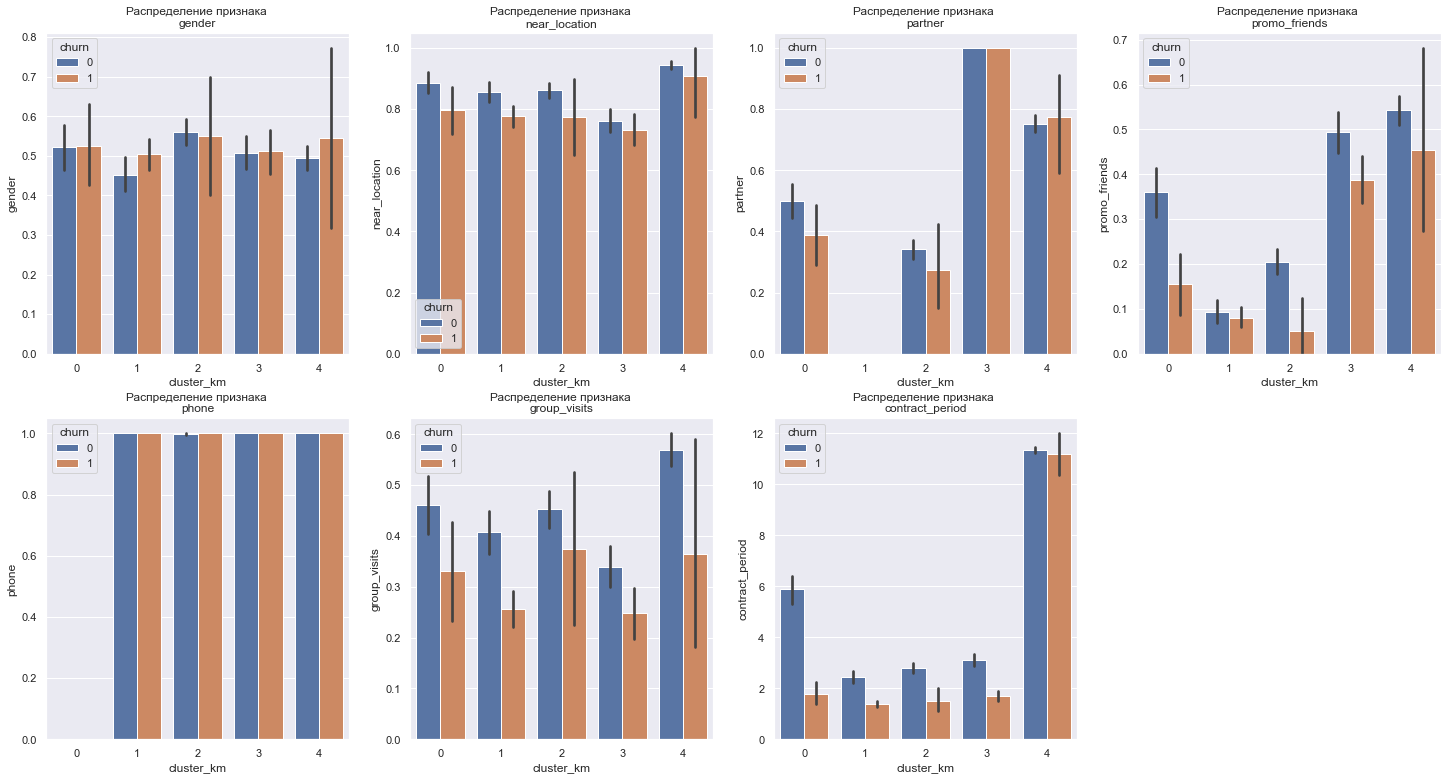

In [35]:
# для биномальных признаков построим столбчатый график
cols_binom = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period']

for i, col in enumerate(cols_binom):
    plt.subplot(2, 4, i+1)
    fig = plt.gcf()
    fig.set_size_inches(25,13)
    sns.barplot(data = df, x = 'cluster_km', y = col, hue = 'churn')
    plt.title('Распределение признака \n'+ str(col))

**Вывод:**

 - Класетры 2, 3. Беглецы! Проблемы с посещением. С коротким договором на посещение. Имеются проблемы с удалйнностью от клуба.

 - Кластер 1. Среднячки! Чаще всего посещают, но не оставляют контакты. Берут абонемент на короткий срок.

 - Кластер 0, 4. Любимчики! Долгосрочные клиенты и те кто берёт точечные периоды, чаще всех посещают. Любят групповые занятия и не редко их приводят друзья.

**Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?**

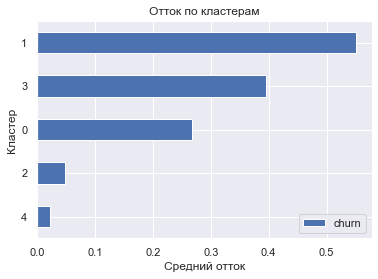

In [36]:
df.groupby(['cluster_km']).agg({'churn' : 'mean'}).sort_values('churn').plot(kind = 'barh')
plt.title('Отток по кластерам')
plt.xlabel('Средний отток')
plt.ylabel('Кластер');

**Вывод:**

Максимальный отток 3, 1 и 1 кластеров 

**Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами**

1. Качество данных хорошее;
2. Признаки которые располагают к оттоку клиентов:
    - локация;
    - партнёрка;
    - рефералка;
    - контактные данные (телефон);
    - период действия абонемента;
    - посещение групповых занятий;
    - частота посещений.
3. Рекомендации:
    - Важно продавать годовые абонементы, делать скидки, устраивать акции и т.п. Клиентам жалко будет потраченных денег, и они будут посещать клуб;
    - Клиенты должны находиться в ближайшей локации от клуба;
    - Важно включать в абонементы групповые занятия; 
    - Регистрацию в клуб необходимо принимать с фиксацией контактов клиента (телефона, почты), чтобы всегда можно было "отловить или догнать" лид и узнать почему он не ходит или что-то порекомендовать и рассказать о текущих акциях.